# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random
from model import load_data, get_analytics
from cytoself_custom import plot_umap, calc_umap_embvec, plot_feature_spectrum_from_image, arrange_plots
from synthetic_multiplexing import multiplex
from metrics import plot_boostrapping, calc_bootstrapping, plot_metrics, calc_reconstruction_error
from explainability import generate_images, plot_clusters_distance_heatmap
from utils import get_colors_dict
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns

import os
import config
from config import SEED, PRETRAINED_MODEL_PATH, MODEL_FOLDER, METRICS_FOLDER, METRICS_MATCH_PATH, METRICS_RANDOM_PATH, MARKERS

np.random.seed(SEED)
random.seed(SEED)

%reload_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



# Logs

In [2]:
import logging
log_file_path = f"./logs/feature_spectrum_log.log"
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s %(levelname)s %(message)s",
                    datefmt="%Y-%m-%d %H:%M:%S",
                    handlers=[
        logging.FileHandler(log_file_path),
        logging.StreamHandler()
    ])

logging.info("init")

2023-01-02 14:31:29 INFO init


# Feature Spectrum

## Config

In [3]:
logging.info(f"Set config")

MODEL_PATH = os.path.join(MODEL_FOLDER, "MODEL18_model_weights.0040.h5")

input_folders =[ "./data/processed/220814_neurons",
                 "./data/processed/220818_neurons",
                 "./data/processed/220831_neurons",
                 "./data/processed/220908",
                 "./data/processed/220914"]
cytoself_model_path = PRETRAINED_MODEL_PATH
neuroself_model_path = MODEL_PATH
markers = MARKERS #['G3BP1', 'PURA', 'FMRP', 'DAPI'] #MARKERS

2023-01-02 14:31:29 INFO Set config


## Load Data

In [4]:
logging.info(f"Loading data")
images, labels, labels_changepoints, markers_order = load_data(input_folders, condition_l=True, type_l=False,
                                                               cell_lines_include=["WT"], 
                                                               split_by_set=True,
                                                               set_type="test",
                                                               markers=markers,
                                                               split_by_set_include=[("WT", "unstressed")])


2023-01-02 14:31:31 INFO Loading data


#########################################################
########### Splitting by set! (test) #############
#########################################################
Input folder: ./data/processed/220814_neurons
Input subfolder: CD41
Filepath: ./data/processed/220814_neurons/WT/unstressed/CD41/220807_iNDI_WT_unstressed-DAPI_CD41_NONO_TDP43-01_WT.tif_processed
Input subfolder: CLTC
Filepath: ./data/processed/220814_neurons/WT/unstressed/CLTC/220808_iNDI_WT_unstressed-DAPI_Phalloidin_PSD95_CLTC-01_WT.tif_processed
Input subfolder: DAPI
Filepath: ./data/processed/220814_neurons/WT/unstressed/DAPI/220805_iNDI_WT_unstressed-DAPI_G3BP1_TIA1_KIF5A-01_WT.tif_processed
Filepath: ./data/processed/220814_neurons/WT/unstressed/DAPI/220807_iNDI_WT_unstressed-DAPI_CD41_NONO_TDP43-01_WT.tif_processed
Filepath: ./data/processed/220814_neurons/WT/unstressed/DAPI/220808_iNDI_WT_unstressed-DAPI_PURA_SQSTM1_FMRP-01_WT.tif_processed
Filepath: ./data/processed/220814_neurons/WT/unstressed/DAPI/220808_iNDI_

## Calculate clustermaps

In [5]:
logging.info(f"Getting analytics...")
analytics_neuroself = get_analytics(images,labels, model_path=neuroself_model_path)
# logging.info(f"Calculating clustermaps...")
# analytics_neuroself.plot_clustermaps(savepath='default', target_vq_layer=2)
logging.info(f"Load clustermaps...")
analytics_neuroself.load_dendrogram_index('./model_outputs/ft_analysis/indhist_heatmap_dgram_index2.npy')

2023-01-02 14:32:20 INFO Getting analytics...


X, y:
(7982, 100, 100, 2) (7982,)
DAPI_stressed              2151
Phalloidin_stressed         321
LAMP1_stressed              283
Calreticulin_stressed       283
FUS_stressed                263
mitotracker_stressed        263
Nucleolin_stressed          263
ANXA11_stressed             243
SNCA_stressed               243
DAPI_unstressed             240
PML_stressed                237
PEX14_stressed              237
TOMM20_stressed             180
TDP43_stressed              178
NONO_stressed               178
CD41_stressed               178
GM130_stressed              177
TIA1_stressed               161
G3BP1_stressed              161
KIF5A_stressed              161
PURA_stressed               158
FMRP_stressed               158
SQSTM1_stressed             158
CLTC_stressed               141
PSD95_stressed              141
DCP1A_stressed              130
NEMO_stressed               130
Phalloidin_unstressed        37
mitotracker_unstressed       29
Nucleolin_unstressed         29
FUS_un

2023-01-02 14:32:20 WARNING From /home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-01-02 14:32:27 WARNING From /home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself/lib/python3.7/site-packages/tensorflow_core/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




All files will be saved at model_outputs/


Loading weights


2023-01-02 14:32:30.381514: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/share/lsf/10.1/linux3.10-glibc2.17-x86_64/lib
2023-01-02 14:32:30.381583: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-02 14:32:30.381621: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cn719.wexac.weizmann.ac.il): /proc/driver/nvidia/version does not exist
2023-01-02 14:32:30.390883: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2023-01-02 14:32:30.430202: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2100000000 Hz
2023-01-02 14:32:30.430467: I tensorflow/compiler/xla/

./models/MODEL18_model_weights.0040.h5
is loaded.
Ground truth:
['ANXA11_stressed' 'ANXA11_unstressed' 'CD41_stressed' 'CD41_unstressed'
 'CLTC_stressed' 'CLTC_unstressed' 'Calreticulin_stressed'
 'Calreticulin_unstressed' 'DAPI_stressed' 'DAPI_unstressed'
 'DCP1A_stressed' 'DCP1A_unstressed' 'FMRP_stressed' 'FMRP_unstressed'
 'FUS_stressed' 'FUS_unstressed' 'G3BP1_stressed' 'G3BP1_unstressed'
 'GM130_stressed' 'GM130_unstressed' 'KIF5A_stressed' 'KIF5A_unstressed'
 'LAMP1_stressed' 'LAMP1_unstressed' 'NEMO_stressed' 'NEMO_unstressed'
 'NONO_stressed' 'NONO_unstressed' 'Nucleolin_stressed'
 'Nucleolin_unstressed' 'PEX14_stressed' 'PEX14_unstressed' 'PML_stressed'
 'PML_unstressed' 'PSD95_stressed' 'PSD95_unstressed' 'PURA_stressed'
 'PURA_unstressed' 'Phalloidin_stressed' 'Phalloidin_unstressed'
 'SNCA_stressed' 'SNCA_unstressed' 'SQSTM1_stressed' 'SQSTM1_unstressed'
 'TDP43_stressed' 'TDP43_unstressed' 'TIA1_stressed' 'TIA1_unstressed'
 'TOMM20_stressed' 'TOMM20_unstressed' 'mitotrack

## Plot

In [6]:
def plot_feature_spectrum_from_image(
        analytics,
        data,
        target_vq_layer=1,
        take_mean=True,
        savepath=None,
        filename="Feature_spectrum",
        title=None,
    ):
        """
        Plot feature spectrum from image.
        :param data: image data; make sure it has 4 dimensions (i.e. batch, x, y, channel).
        :param target_vq_layer: 1 for local representation, 2 for global representation
        :param take_mean: take mean spectrum if multiple images were inputted, otherwise plot multiple subplots.
        :param savepath: save path
        :param filename: file name
        :param title: plot title
        """
        embindhist = analytics.model.calc_embindhist(data, do_return=True)
        if len(analytics.dendrogram_index) == 0:
            ValueError("No dendrogram_index found. Load dendrogram_index first.")

        embindhist = embindhist[target_vq_layer - 1][
            :, analytics.dendrogram_index[target_vq_layer - 1]
        ]
        plot_feature_spectrum_from_vqindhist(
            analytics,
            embindhist,
            take_mean=take_mean,
            savepath=savepath,
            filename=filename,
            title=title,
        )

def plot_feature_spectrum_from_vqindhist(
    analytics,
    embindhist,
    take_mean=True,
    savepath=None,
    filename="Feature_spectrum",
    title=None,
):
    """
    Plot feature spectrum from vq index histogram.
    :param embindhist: vq index histogram data; make sure it has 2 dimensions (i.e. batch, index histogram).
    :param take_mean: take mean spectrum if multiple images were inputted, otherwise plot multiple subplots.
    :param savepath: save path
    :param filename: file name
    :param title: plot title
    """

    n_row = 1 if take_mean else embindhist.shape[0]
    if take_mean:
        embindhist = np.mean(embindhist, axis=0, keepdims=True)

    n_index = embindhist.shape[1]
    plt.figure(figsize=(10 * n_index / 136.5, 3 * n_row))
    for i in range(n_row):
        plt.subplot(n_row, 1, i + 1)
        plt.bar(np.arange(n_index), embindhist[i])
        if title:
            if i == 0:
                plt.title(title)
        plt.ylabel("Counts")
        plt.xlim([0, n_index])
        plt.xticks(np.arange(0, n_index, 100))
    plt.xlabel("Feature index")
    # plt.tight_layout()
    if savepath:
        if savepath == "default":
            savepath = analytics.model.savepath_dict["ft"]
        plt.savefig(os.path.join(savepath, f"{filename}.png"), dpi=300)
    else:
        plt.show()

2023-01-02 14:32:35 INFO Plotting feature spectrum:
2023-01-02 14:32:35 INFO Current Item: CD41_unstressed


Inferring embedding histogram...
23/23 [==============================] - 3s 131ms/sample


2023-01-02 14:32:46 INFO Current Item: CD41_stressed


Inferring embedding histogram...
178/178 [==============================] - 14s 81ms/sample


2023-01-02 14:33:08 INFO Current Item: CLTC_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 75ms/sample


2023-01-02 14:33:17 INFO Current Item: CLTC_stressed


Inferring embedding histogram...
141/141 [==============================] - 11s 76ms/sample


2023-01-02 14:33:36 INFO Current Item: FMRP_unstressed


Inferring embedding histogram...
18/18 [==============================] - 1s 72ms/sample


2023-01-02 14:33:44 INFO Current Item: FMRP_stressed


Inferring embedding histogram...
158/158 [==============================] - 13s 80ms/sample


2023-01-02 14:34:05 INFO Current Item: G3BP1_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 83ms/sample


2023-01-02 14:34:15 INFO Current Item: G3BP1_stressed


Inferring embedding histogram...
161/161 [==============================] - 14s 86ms/sample


2023-01-02 14:34:38 INFO Current Item: KIF5A_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 82ms/sample


2023-01-02 14:34:48 INFO Current Item: KIF5A_stressed


Inferring embedding histogram...
161/161 [==============================] - 14s 85ms/sample


2023-01-02 14:35:11 INFO Current Item: NONO_unstressed


Inferring embedding histogram...
23/23 [==============================] - 2s 83ms/sample


2023-01-02 14:35:21 INFO Current Item: NONO_stressed


Inferring embedding histogram...
178/178 [==============================] - 15s 84ms/sample


2023-01-02 14:35:46 INFO Current Item: Phalloidin_unstressed


Inferring embedding histogram...
37/37 [==============================] - 3s 83ms/sample


2023-01-02 14:35:57 INFO Current Item: Phalloidin_stressed


Inferring embedding histogram...
321/321 [==============================] - 28s 88ms/sample


2023-01-02 14:36:34 INFO Current Item: PSD95_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 85ms/sample


2023-01-02 14:36:44 INFO Current Item: PSD95_stressed


Inferring embedding histogram...
141/141 [==============================] - 12s 88ms/sample


2023-01-02 14:37:06 INFO Current Item: PURA_unstressed


Inferring embedding histogram...
18/18 [==============================] - 2s 84ms/sample


2023-01-02 14:37:17 INFO Current Item: PURA_stressed


Inferring embedding histogram...
158/158 [==============================] - 14s 87ms/sample


2023-01-02 14:37:38 INFO Current Item: SQSTM1_unstressed


Inferring embedding histogram...
18/18 [==============================] - 2s 86ms/sample


2023-01-02 14:37:51 INFO Current Item: SQSTM1_stressed


Inferring embedding histogram...
158/158 [==============================] - 14s 89ms/sample


2023-01-02 14:38:14 INFO Current Item: TDP43_unstressed


Inferring embedding histogram...
23/23 [==============================] - 2s 85ms/sample


/home/labs/hornsteinlab/sagyk/anaconda3/envs/cytoself/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
2023-01-02 14:38:24 INFO Current Item: TDP43_stressed


Inferring embedding histogram...
178/178 [==============================] - 16s 88ms/sample


2023-01-02 14:38:49 INFO Current Item: TIA1_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 86ms/sample


2023-01-02 14:38:59 INFO Current Item: TIA1_stressed


Inferring embedding histogram...
161/161 [==============================] - 14s 88ms/sample


2023-01-02 14:39:24 INFO Current Item: NEMO_unstressed


Inferring embedding histogram...
19/19 [==============================] - 2s 86ms/sample


2023-01-02 14:39:35 INFO Current Item: NEMO_stressed


Inferring embedding histogram...
130/130 [==============================] - 12s 89ms/sample


2023-01-02 14:39:55 INFO Current Item: DCP1A_unstressed


Inferring embedding histogram...
19/19 [==============================] - 2s 86ms/sample


2023-01-02 14:40:05 INFO Current Item: DCP1A_stressed


Inferring embedding histogram...
130/130 [==============================] - 12s 89ms/sample


2023-01-02 14:40:25 INFO Current Item: TOMM20_unstressed


Inferring embedding histogram...
16/16 [==============================] - 1s 87ms/sample


2023-01-02 14:40:38 INFO Current Item: TOMM20_stressed


Inferring embedding histogram...
180/180 [==============================] - 16s 88ms/sample


2023-01-02 14:41:02 INFO Current Item: ANXA11_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 86ms/sample


2023-01-02 14:41:13 INFO Current Item: ANXA11_stressed


Inferring embedding histogram...
243/243 [==============================] - 21s 88ms/sample


2023-01-02 14:41:43 INFO Current Item: Calreticulin_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 86ms/sample


2023-01-02 14:41:53 INFO Current Item: Calreticulin_stressed


Inferring embedding histogram...
283/283 [==============================] - 25s 88ms/sample


2023-01-02 14:42:27 INFO Current Item: FUS_unstressed


Inferring embedding histogram...
29/29 [==============================] - 2s 86ms/sample


2023-01-02 14:42:42 INFO Current Item: FUS_stressed


Inferring embedding histogram...
263/263 [==============================] - 23s 89ms/sample


2023-01-02 14:43:13 INFO Current Item: LAMP1_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 87ms/sample


2023-01-02 14:43:24 INFO Current Item: LAMP1_stressed


Inferring embedding histogram...
283/283 [==============================] - 25s 89ms/sample


2023-01-02 14:43:57 INFO Current Item: mitotracker_unstressed


Inferring embedding histogram...
29/29 [==============================] - 2s 85ms/sample


2023-01-02 14:44:08 INFO Current Item: mitotracker_stressed


Inferring embedding histogram...
263/263 [==============================] - 23s 86ms/sample


2023-01-02 14:44:39 INFO Current Item: Nucleolin_unstressed


Inferring embedding histogram...
29/29 [==============================] - 2s 83ms/sample


2023-01-02 14:44:50 INFO Current Item: Nucleolin_stressed


Inferring embedding histogram...
263/263 [==============================] - 22s 85ms/sample


2023-01-02 14:45:20 INFO Current Item: SNCA_unstressed


Inferring embedding histogram...
21/21 [==============================] - 2s 81ms/sample


2023-01-02 14:45:35 INFO Current Item: SNCA_stressed


Inferring embedding histogram...
243/243 [==============================] - 21s 85ms/sample


2023-01-02 14:46:03 INFO Current Item: GM130_unstressed


Inferring embedding histogram...
27/27 [==============================] - 2s 82ms/sample


2023-01-02 14:46:13 INFO Current Item: GM130_stressed


Inferring embedding histogram...
177/177 [==============================] - 15s 84ms/sample


2023-01-02 14:46:36 INFO Current Item: PEX14_unstressed


Inferring embedding histogram...
24/24 [==============================] - 2s 82ms/sample


2023-01-02 14:46:47 INFO Current Item: PEX14_stressed


Inferring embedding histogram...
237/237 [==============================] - 20s 85ms/sample


2023-01-02 14:47:15 INFO Current Item: PML_unstressed


Inferring embedding histogram...
24/24 [==============================] - 2s 80ms/sample


2023-01-02 14:47:25 INFO Current Item: PML_stressed


Inferring embedding histogram...
237/237 [==============================] - 20s 85ms/sample


2023-01-02 14:47:53 INFO Current Item: DAPI_unstressed


Inferring embedding histogram...
240/240 [==============================] - 21s 86ms/sample


2023-01-02 14:48:28 INFO Current Item: DAPI_stressed


Inferring embedding histogram...
2151/2151 [==============================] - 191s 89ms/sample


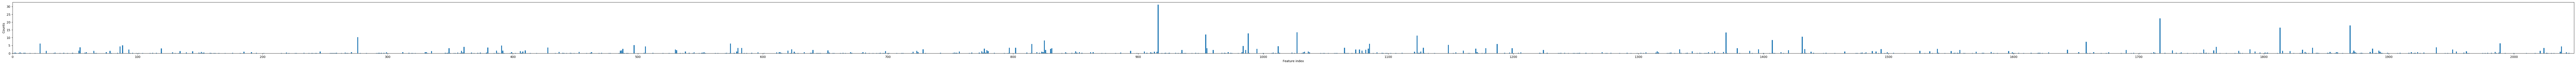

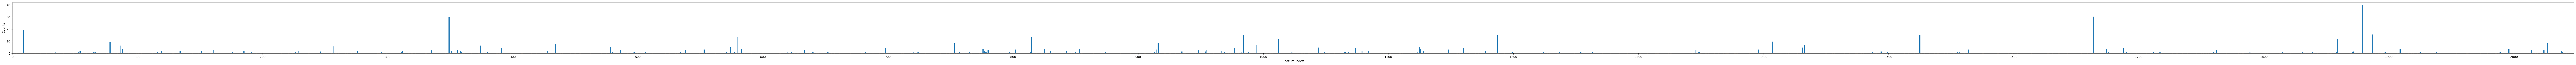

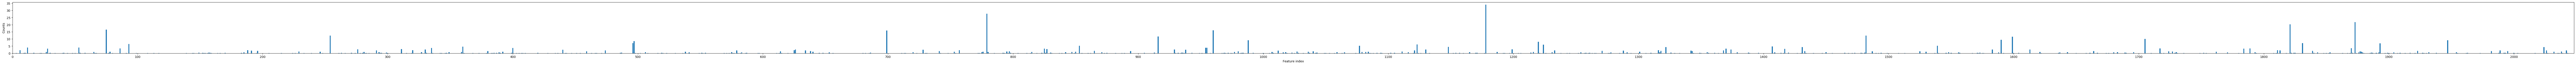

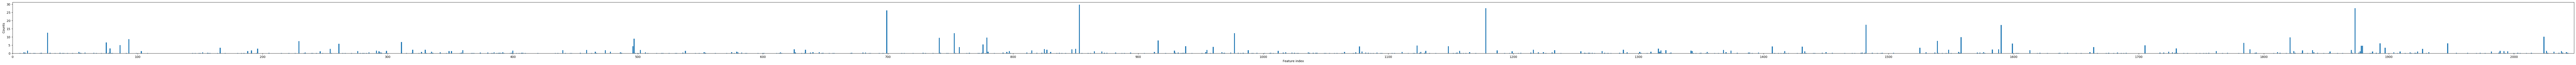

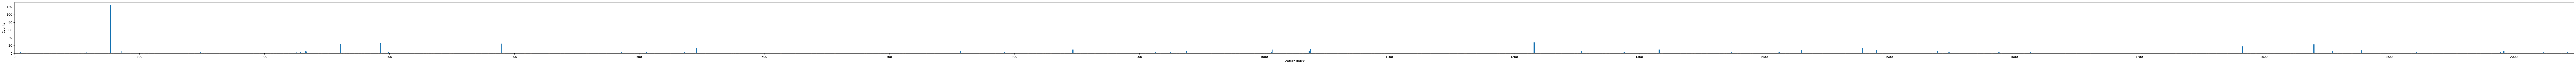

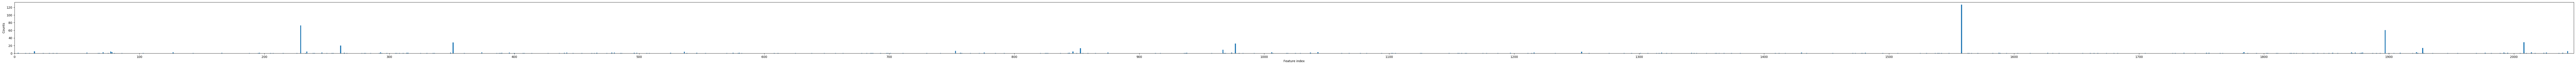

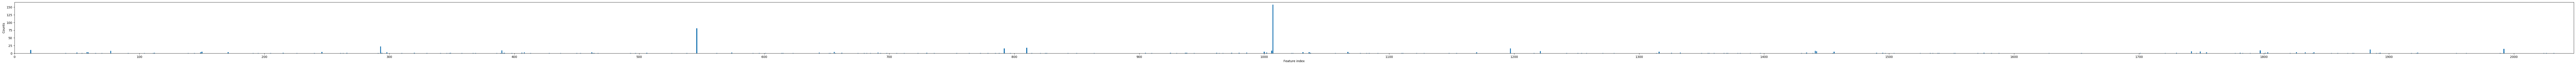

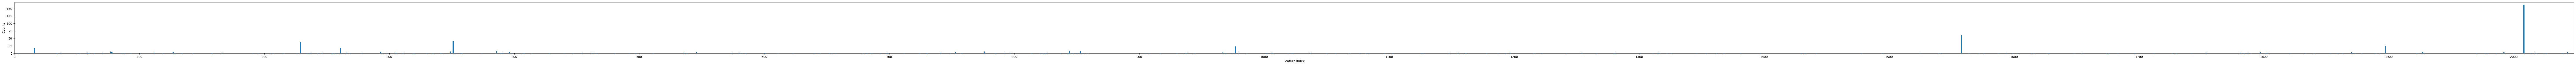

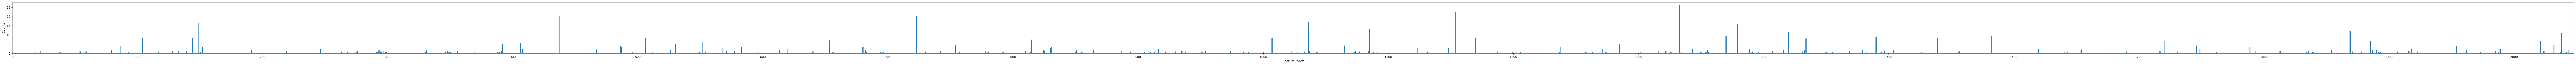

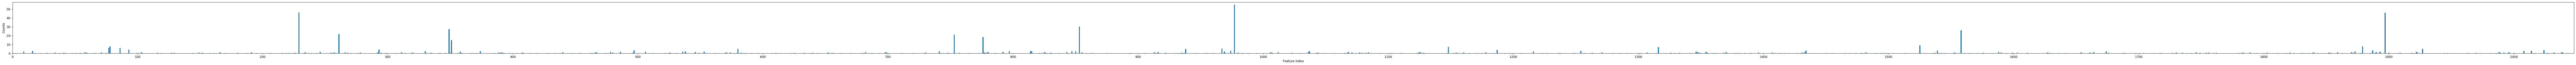

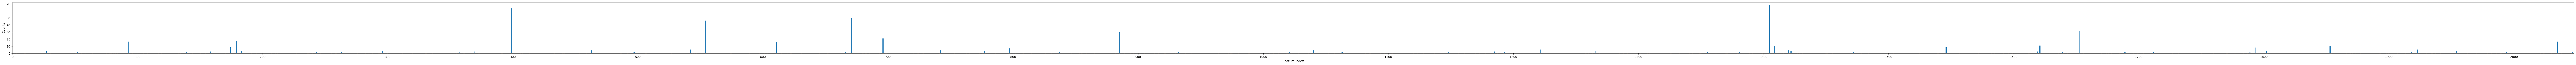

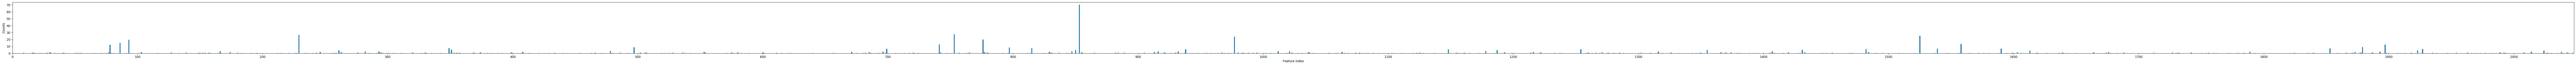

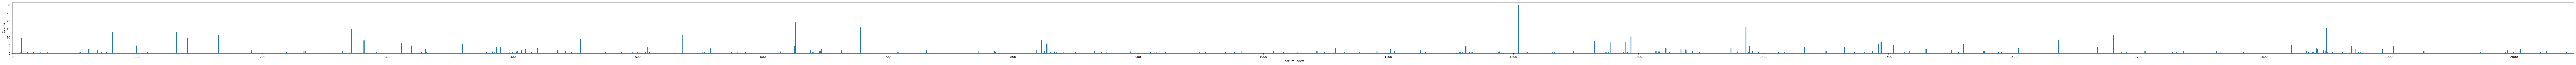

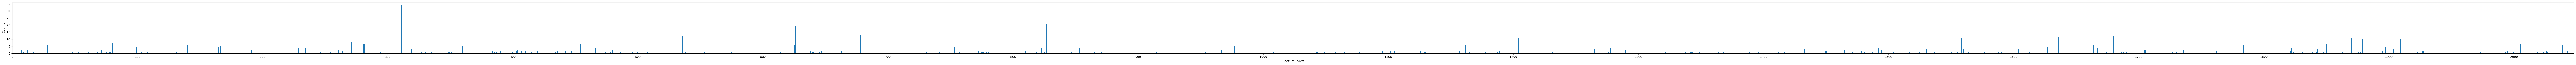

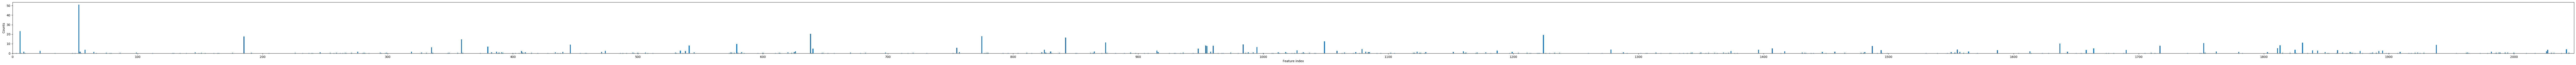

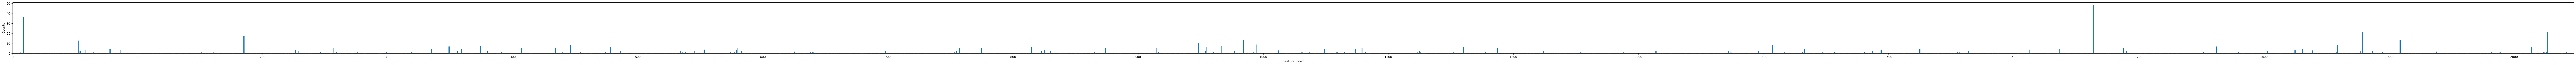

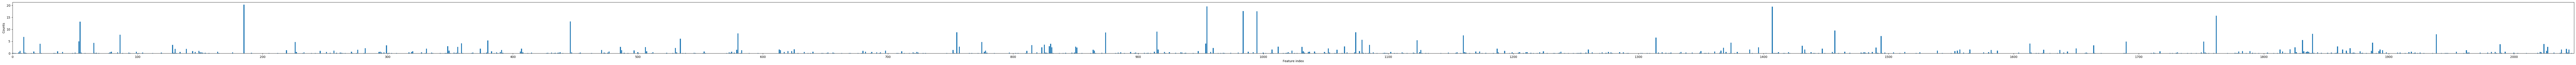

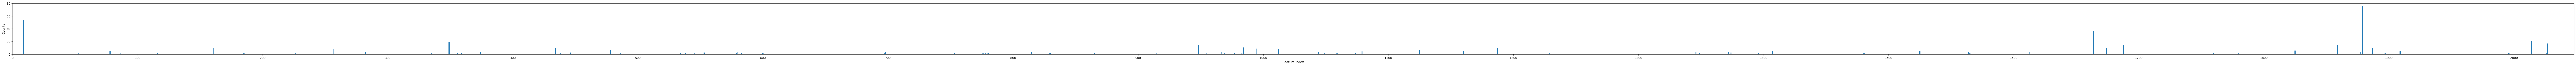

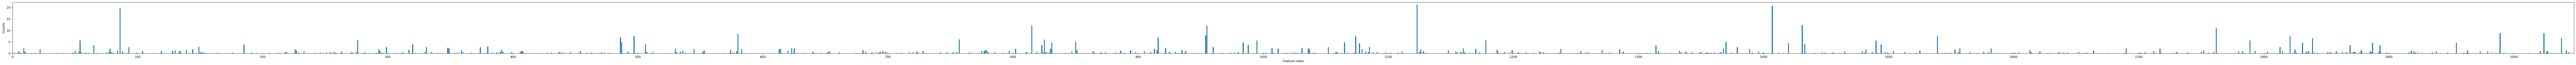

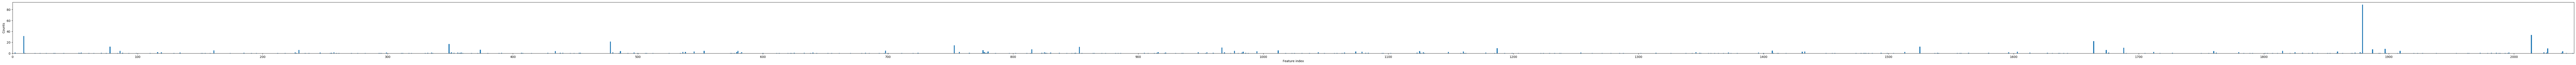

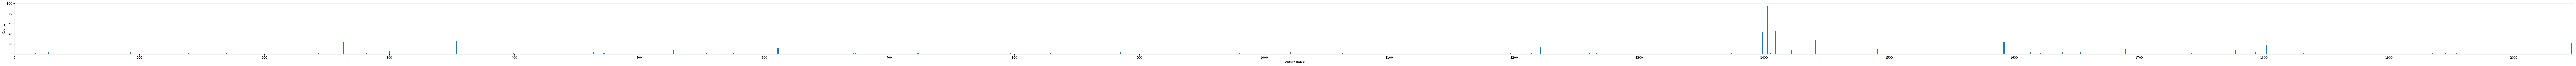

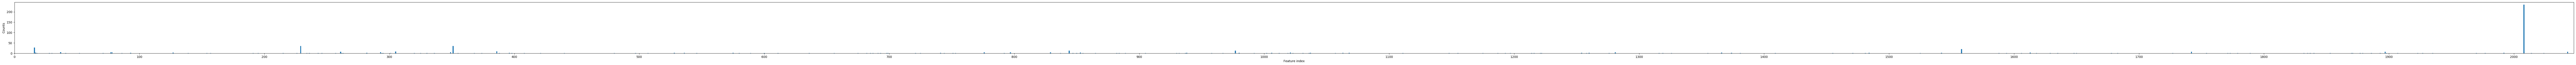

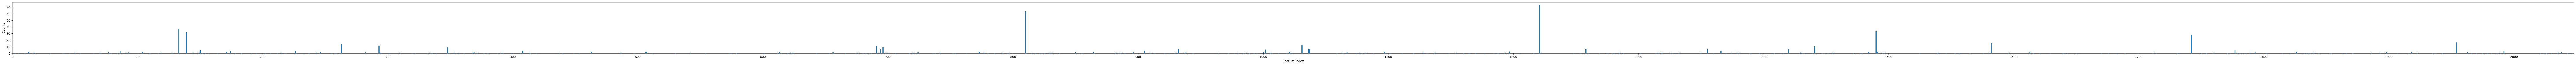

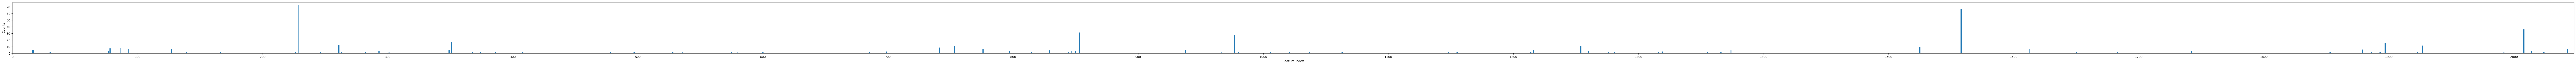

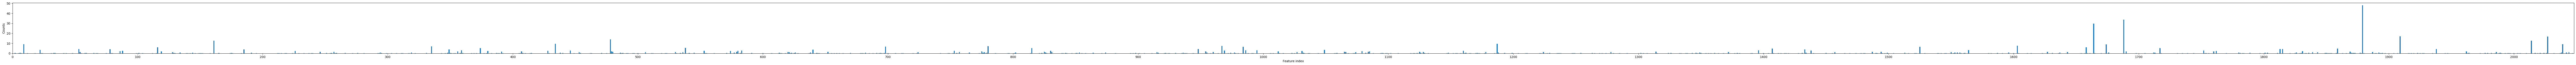

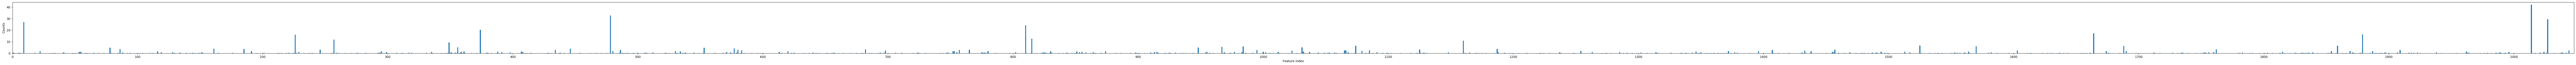

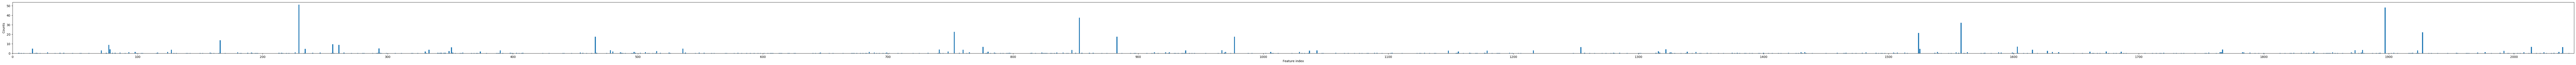

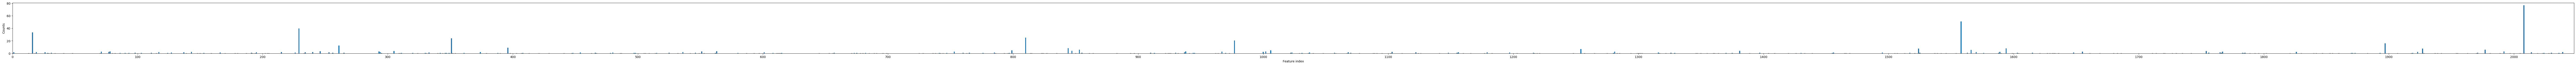

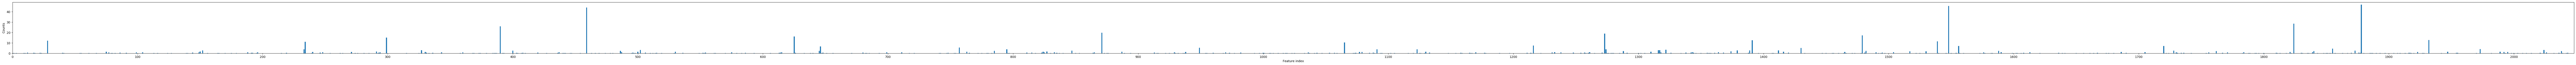

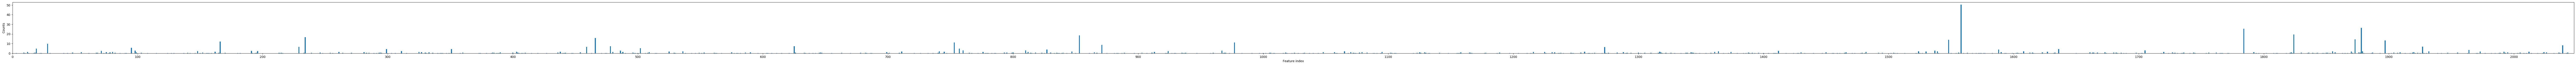

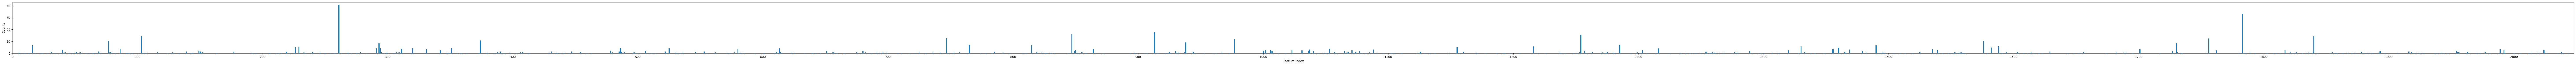

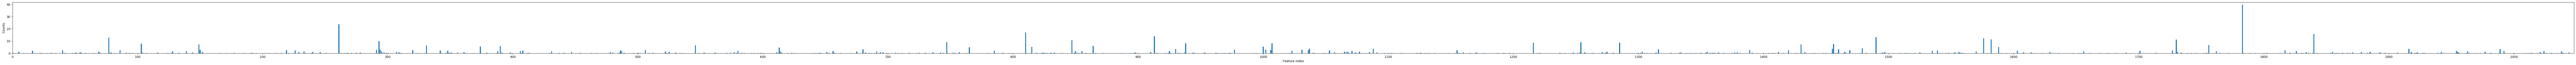

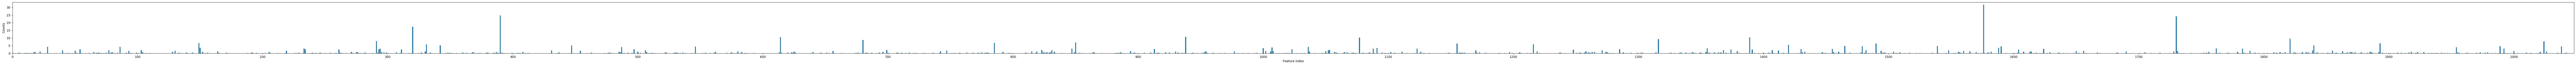

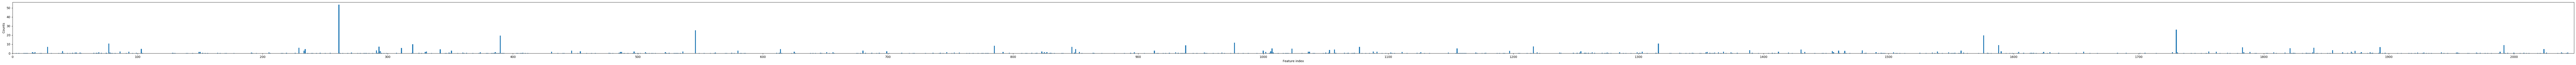

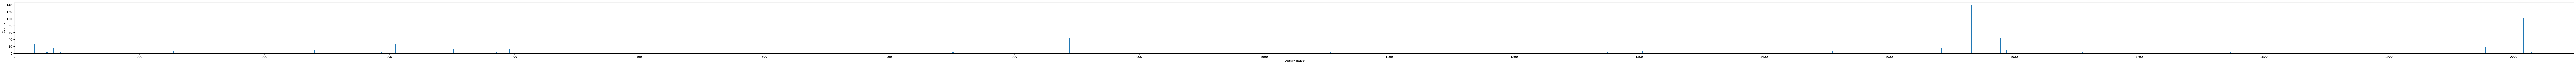

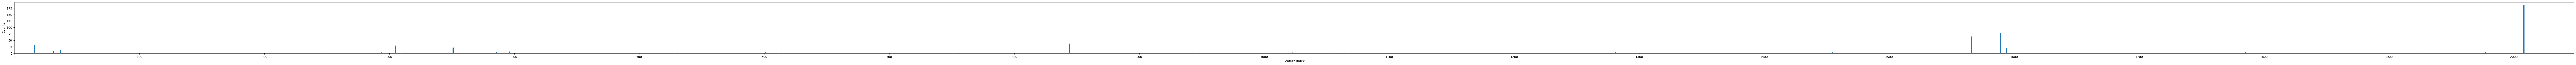

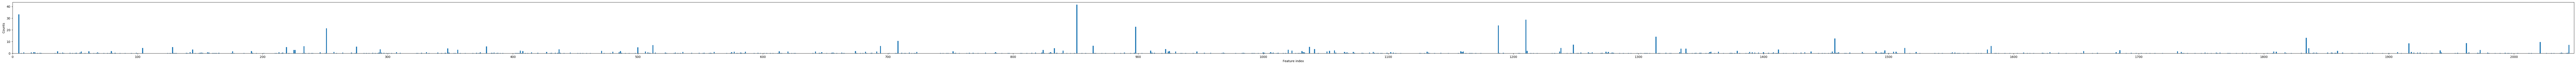

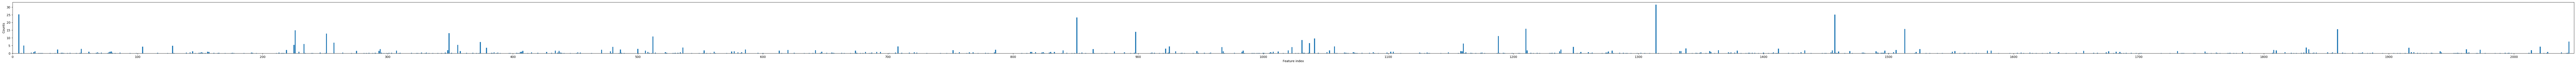

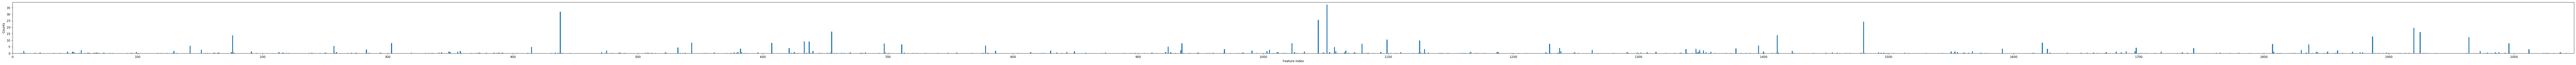

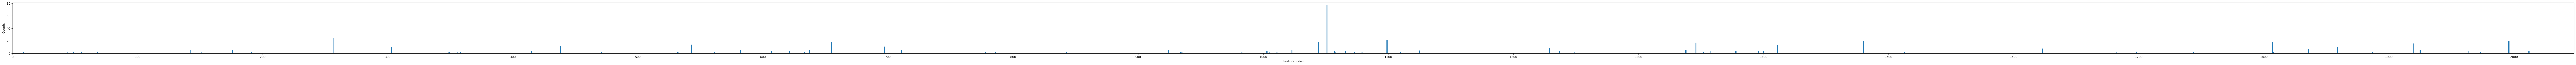

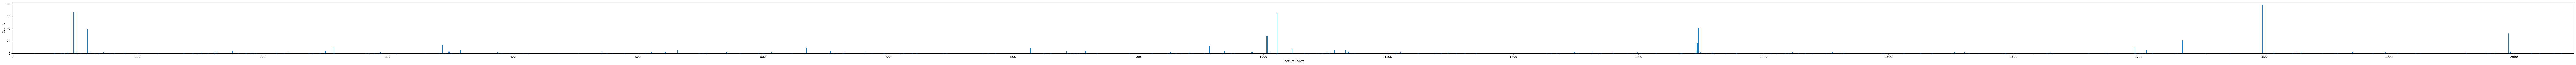

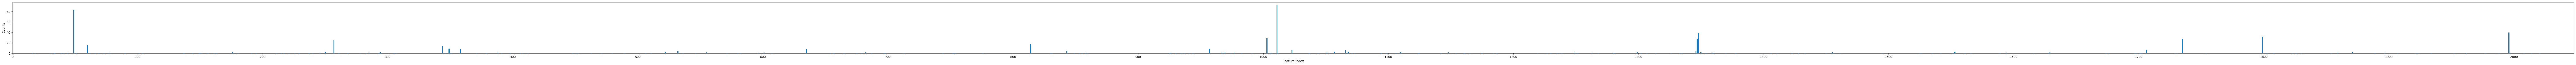

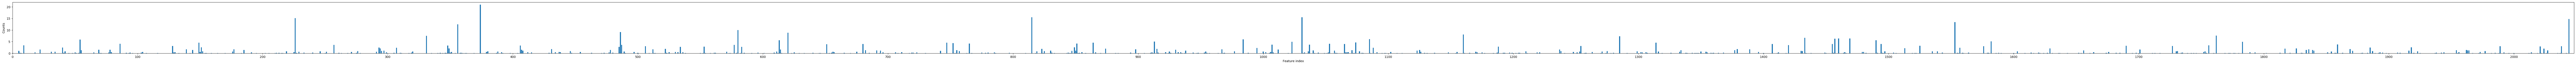

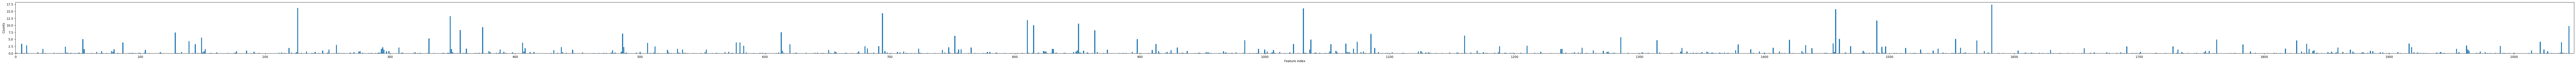

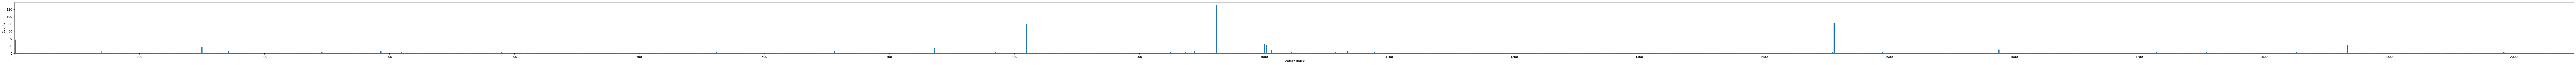

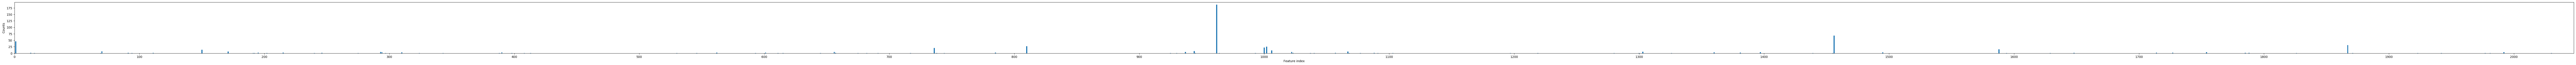

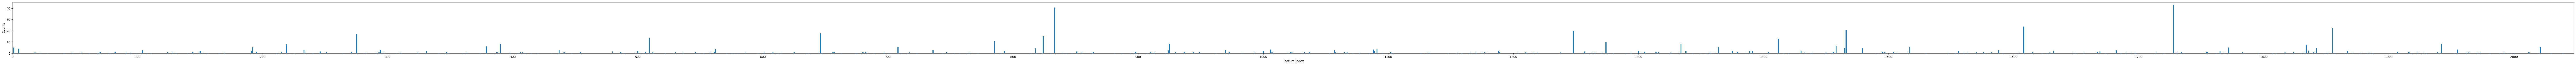

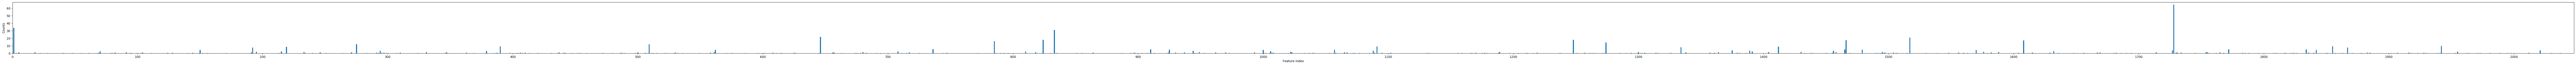

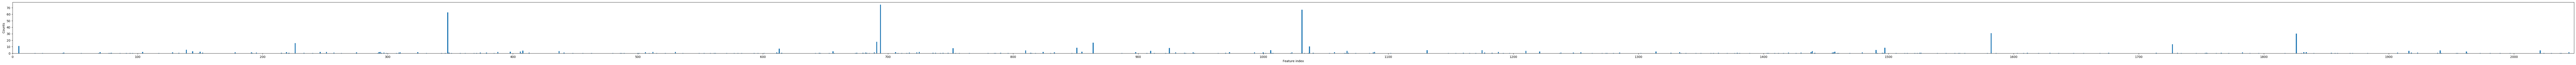

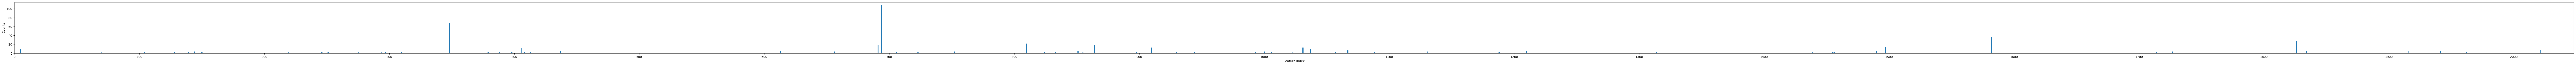

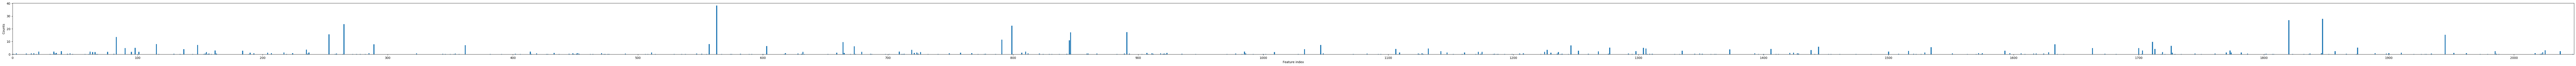

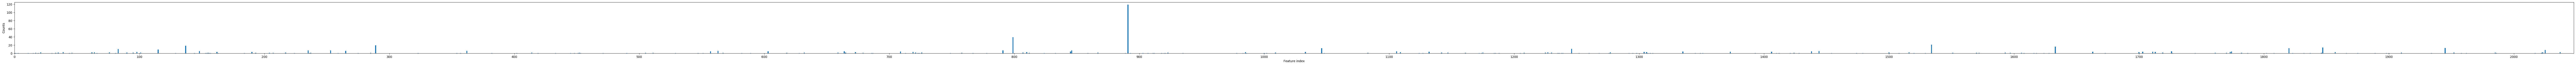

In [7]:
logging.info(f"Plotting feature spectrum:")

for m in markers:
    for c in ['unstressed', 'stressed']:
        labels_s = pd.Series(labels.reshape(-1,))
        # markers_regex = '|'.join(list(map(lambda x: f"^{x}$|^{x}_", [m])))    
        markers_regex = f'{m}_{c}'
        markers_indexes = labels_s[labels_s.str.contains(markers_regex)].index
        images_subset = images[markers_indexes]
        labels_subset = labels[markers_indexes]

        logging.info(f"Current Item: {m}_{c}")
        plot_feature_spectrum_from_image(analytics_neuroself, images_subset, savepath='default', filename=f'{m}_{c}')

In [8]:
logging.info(f"Done.")

2023-01-02 14:54:47 INFO Done.
